In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

### Hierarhcial Clustering

In [4]:
def std_func(i):
    x=(i-i.mean())/i.std()
    return(x)

In [5]:
df_std=std_func(data.iloc[:,1:])
df_std.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


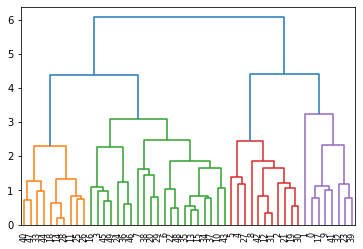

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_std, method="complete"))

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [8]:
y_hc = hc.fit_predict(df_std)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [9]:
data['h_clusterid']=pd.Series(y_hc)
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [10]:
data.iloc[:,1:].groupby("h_clusterid").mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [11]:
data.iloc[:,1:].sort_values("h_clusterid").mean()

Murder           7.788
Assault        170.760
UrbanPop        65.540
Rape            21.232
h_clusterid      1.460
dtype: float64

In [12]:
df_std.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.543210e-16,1.115774e-16,-4.307665e-16,8.704149e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.604405e+00,-1.509042e+00,-2.317136e+00,-1.487447e+00
25%,-8.524835e-01,-7.410815e-01,-7.627068e-01,-6.573508e-01
50%,-1.235217e-01,-1.411127e-01,3.177945e-02,-1.208577e-01
75%,7.948553e-01,9.388312e-01,8.435371e-01,5.277383e-01
max,2.206860e+00,1.994776e+00,1.758923e+00,2.644350e+00


### K-Means Clustering

In [13]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(df_std)
print(labels)

[3 2 2 3 2 2 0 0 2 3 0 1 2 0 1 0 1 3 1 2 0 2 1 3 2 1 1 2 1 0 2 2 3 1 0 0 0
 0 0 3 1 3 2 0 1 0 0 1 1 0]


In [14]:
data["labels"]=labels

In [15]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,2,2
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,2,2
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,2
9,Georgia,17.4,211,60,25.8,0,3


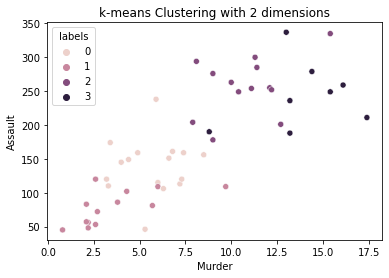

In [16]:
sns.scatterplot(x="Murder",y="Assault",hue=data["labels"],data=data)
plt.title('k-means Clustering with 2 dimensions')
plt.show()

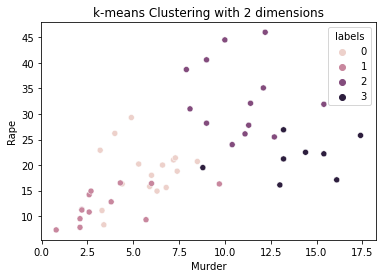

In [17]:
sns.scatterplot(x="Murder",y="Rape",hue=data["labels"],data=data)
plt.title('k-means Clustering with 2 dimensions')
plt.show()

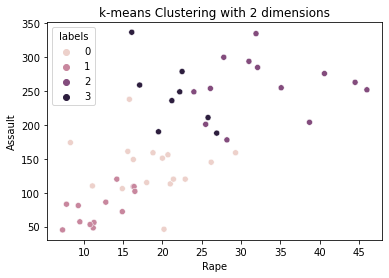

In [18]:
sns.scatterplot(x="Rape",y="Assault",hue=data["labels"],data=data)
plt.title('k-means Clustering with 2 dimensions')
plt.show()

In [19]:
kmeans.cluster_centers_

array([[-0.48943754, -0.38260013,  0.57582979, -0.26165379],
       [-0.96154072, -1.106601  , -0.93010687, -0.96676331],
       [ 0.6950701 ,  1.03944141,  0.72263703,  1.27693964],
       [ 1.41188984,  0.8743346 , -0.81452109,  0.01927104]])

In [20]:
k=list(range(2,10))
k
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_std)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_std.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_std.shape[1]))))
    #wcss.append(kmeans.inertia_)
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))

TWSS when k is 2 [66.72776899]
TWSS when k is 3 [57.52427521]
TWSS when k is 4 [49.81730942]
TWSS when k is 5 [45.88788775]
TWSS when k is 6 [43.45558668]
TWSS when k is 7 [41.43727079]
TWSS when k is 8 [39.43701652]
TWSS when k is 9 [37.10889316]


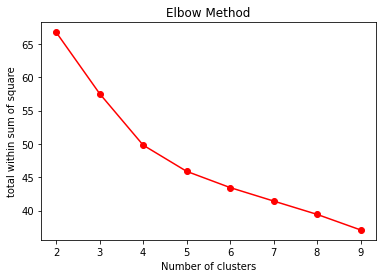

In [21]:
plt.plot(k,TWSS,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('total within sum of square')
plt.show()

### DBSCAN 

In [22]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [23]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   3. ],
       [  9. , 276. ,  91. ,  40.6,   2. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ,   1. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ,   1. ],
       [ 11.3, 300. ,  67. ,  2

In [24]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [25]:
dbscan = DBSCAN(eps=2.5, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=2.5, min_samples=8)

In [26]:
(dbscan.labels_)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [27]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [28]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [29]:
clustered=pd.concat([data,cl],axis=1)

In [30]:
clustered[clustered['cluster']==0]

,Murder,Assault,UrbanPop,Rape,h_clusterid,labels,cluster
0,13.2,236,58,21.2,0,3,0
2,8.1,294,80,31.0,2,2,0
3,8.8,190,50,19.5,1,3,0
4,9.0,276,91,40.6,2,2,0
5,7.9,204,78,38.7,2,2,0
6,3.3,110,77,11.1,1,0,0
7,5.9,238,72,15.8,1,0,0
8,15.4,335,80,31.9,2,2,0
9,17.4,211,60,25.8,0,3,0
10,5.3,46,83,20.2,1,0,0


In [31]:
clustered[clustered['cluster']==0].mean()

Murder           7.742857
Assault        168.877551
UrbanPop        65.897959
Rape            20.757143
h_clusterid      1.489796
labels           1.244898
cluster          0.000000
dtype: float64

In [32]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,h_clusterid,labels,cluster
1,10.0,263,48,44.5,0,2,-1


In [33]:
data

,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,2,2
3,8.8,190,50,19.5,1,3
4,9.0,276,91,40.6,2,2
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,2,2
9,17.4,211,60,25.8,0,3
